In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans  # Import KMeans

In [2]:
df = pd.read_csv("C:\\Users\\ab31s\\Downloads\\archive (26)\\Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.drop(["CustomerID"],axis=1, inplace=True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


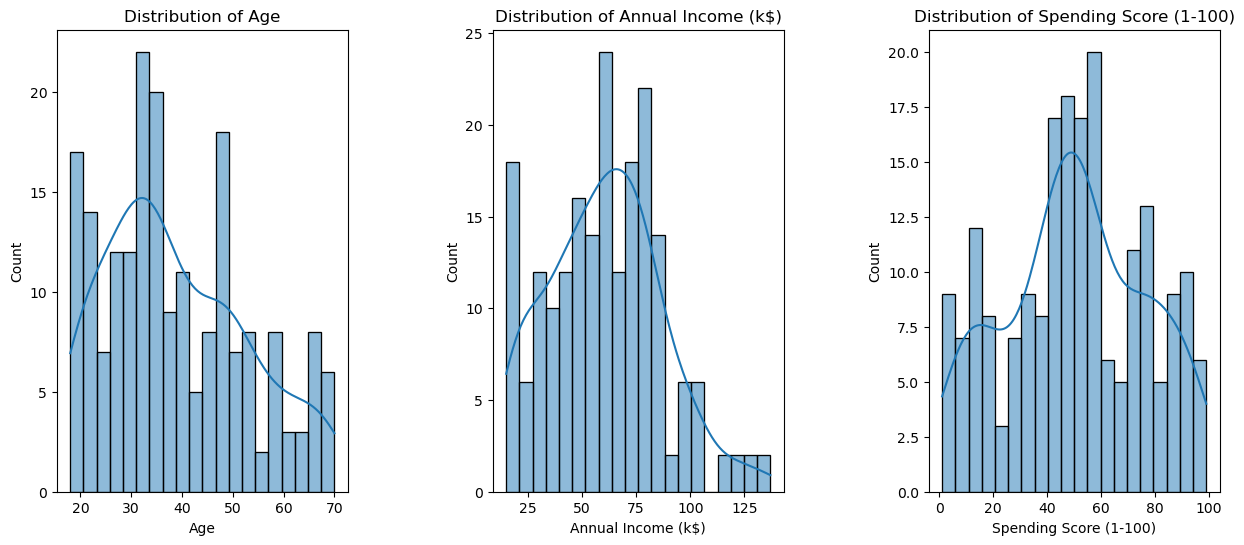

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)  # Changed to sns.histplot for compatibility
    plt.title('Distribution of {}'.format(x))
    
plt.show()


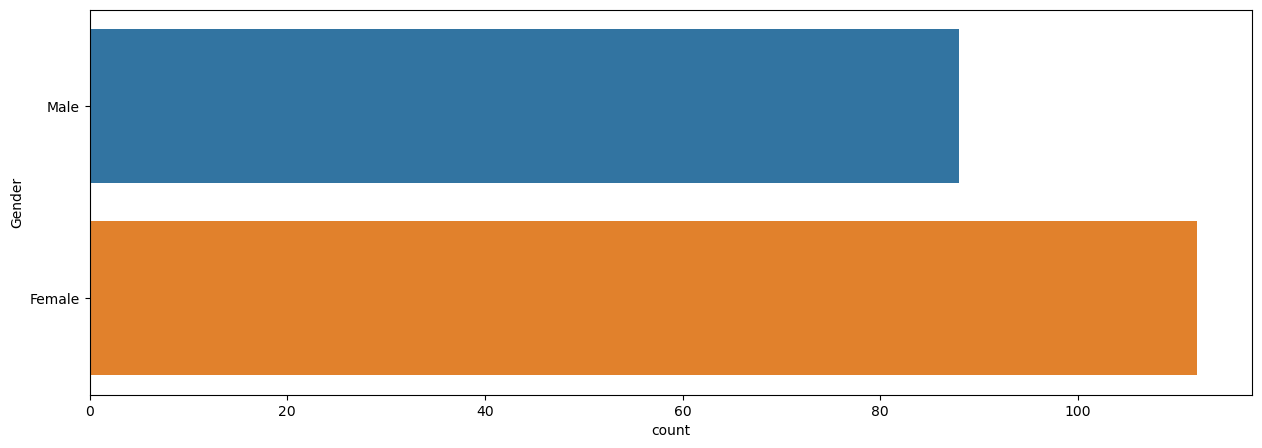

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

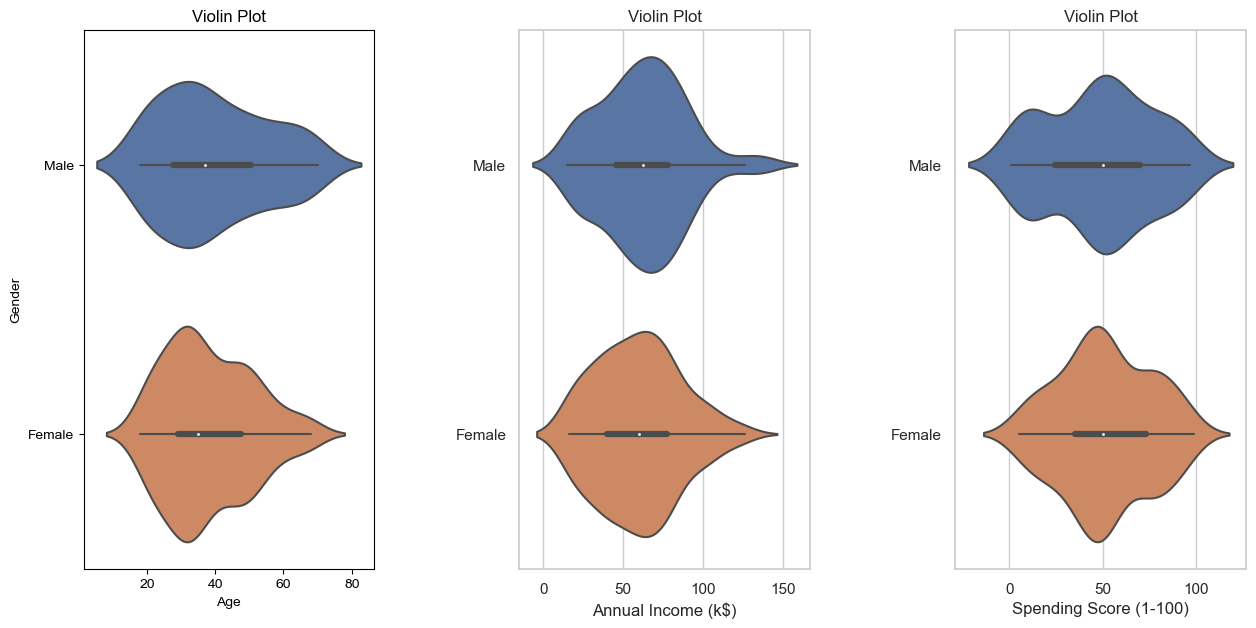

In [12]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df )
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

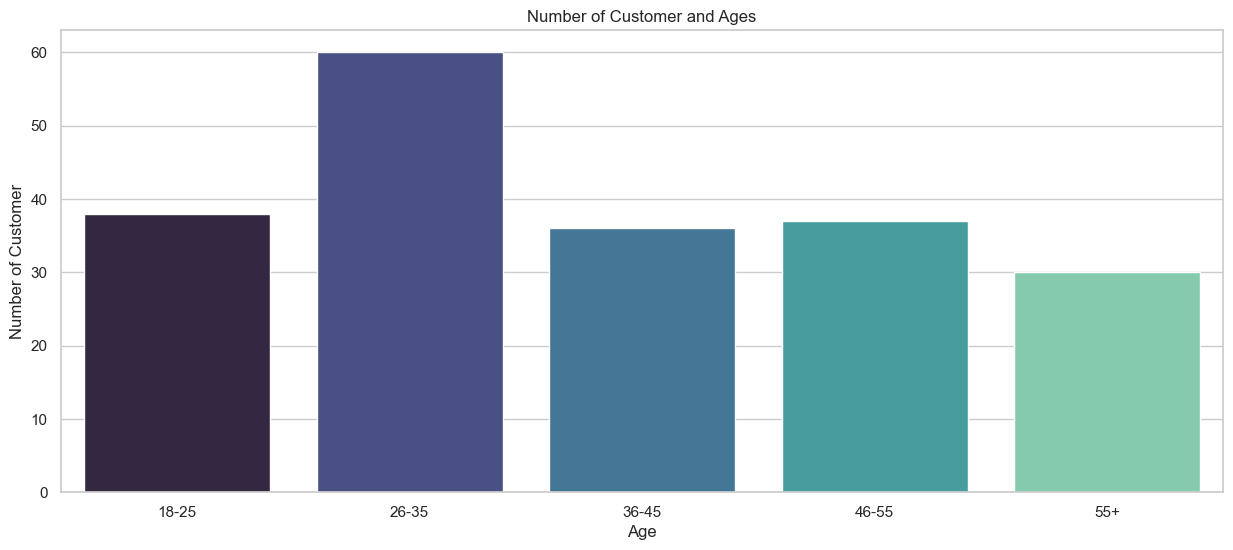

In [13]:
age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above = df.Age[df.Age>=55]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

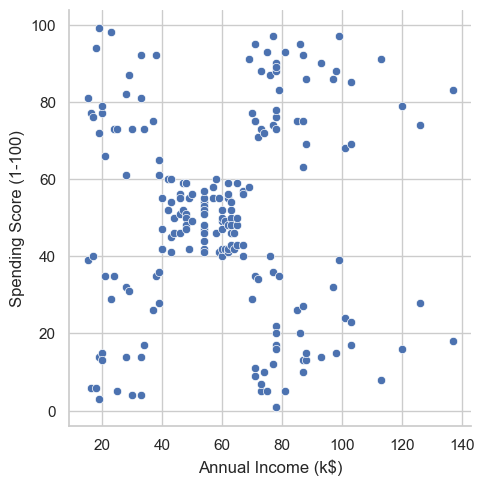

In [14]:
sns.relplot(x="Annual Income (k$)", y= "Spending Score (1-100)", data = df)

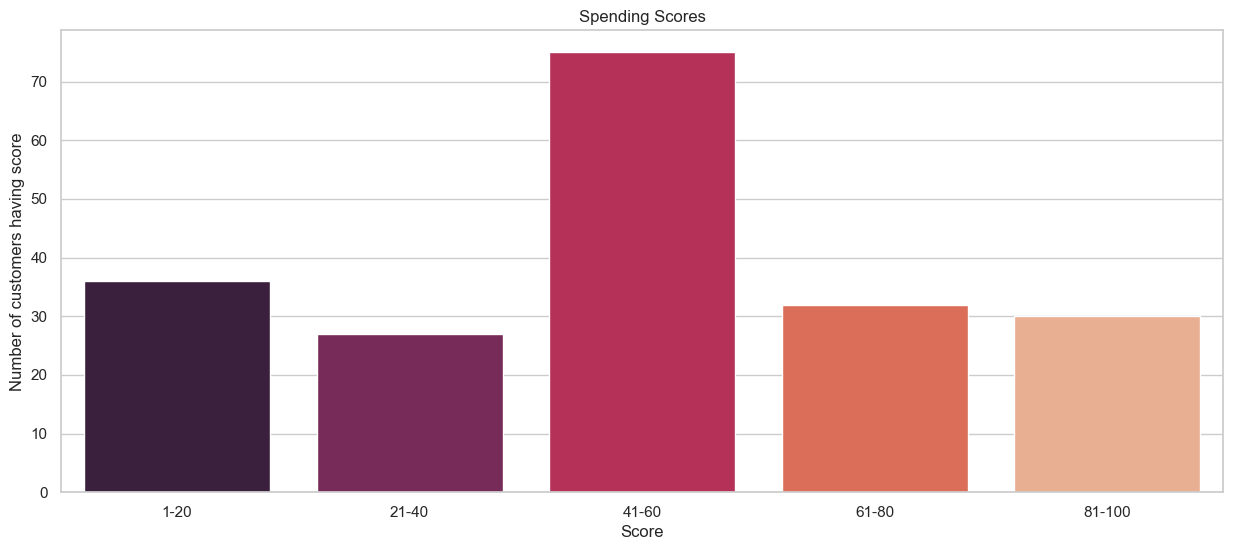

In [15]:
ss_1_20 = df['Spending Score (1-100)'][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss_21_40 = df['Spending Score (1-100)'][(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss_41_60 = df['Spending Score (1-100)'][(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"]<=60)]
ss_61_80 = df['Spending Score (1-100)'][(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"]<=80)]
ss_81_100 = df['Spending Score (1-100)'][(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"]<=100)]

ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of customers having score")
plt.show()

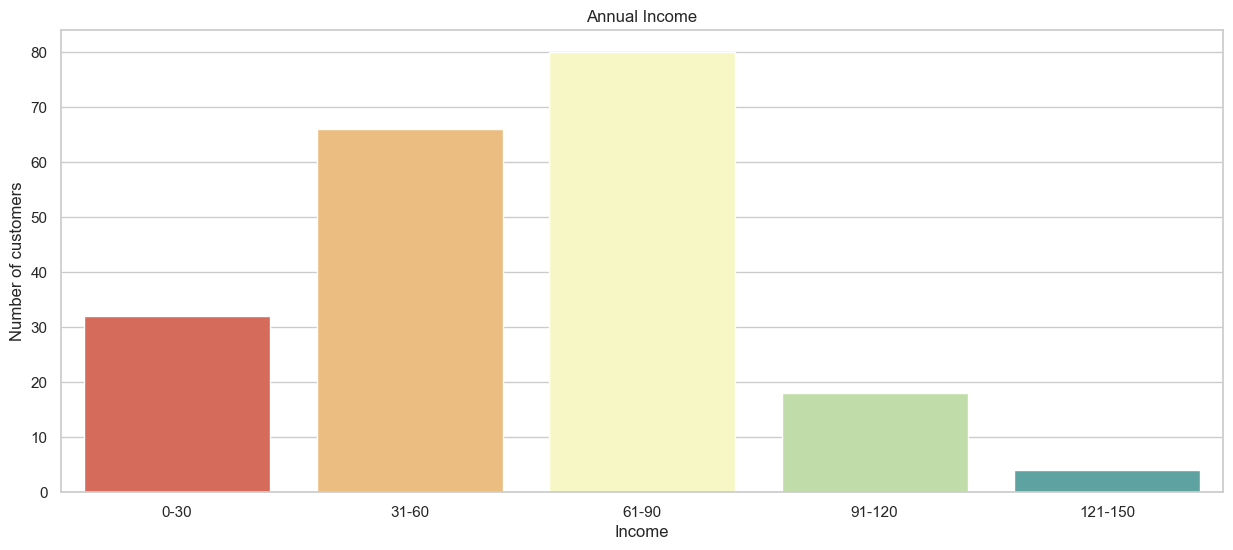

In [16]:
ai_0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"] <=30)]
ai_31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"] <=60)]
ai_61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"] <=90)]
ai_91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"] <=120)]
ai_121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) & (df["Annual Income (k$)"] <=150)]

aix =["0-30","31-60","61-90","91-120","121-150"]
aiy =[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette="Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


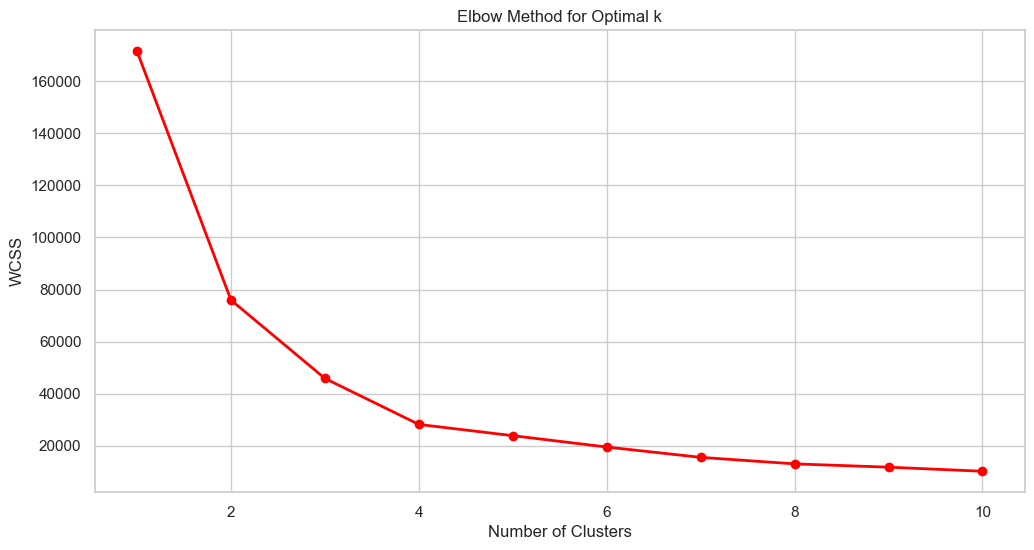

In [17]:

X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

# List to store the WCSS values
wcss = []

# Calculate WCSS for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss,linewidth=2,color='red', marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [19]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


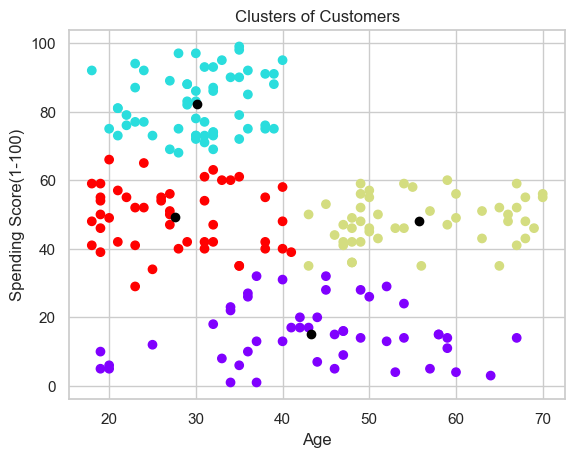

In [20]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


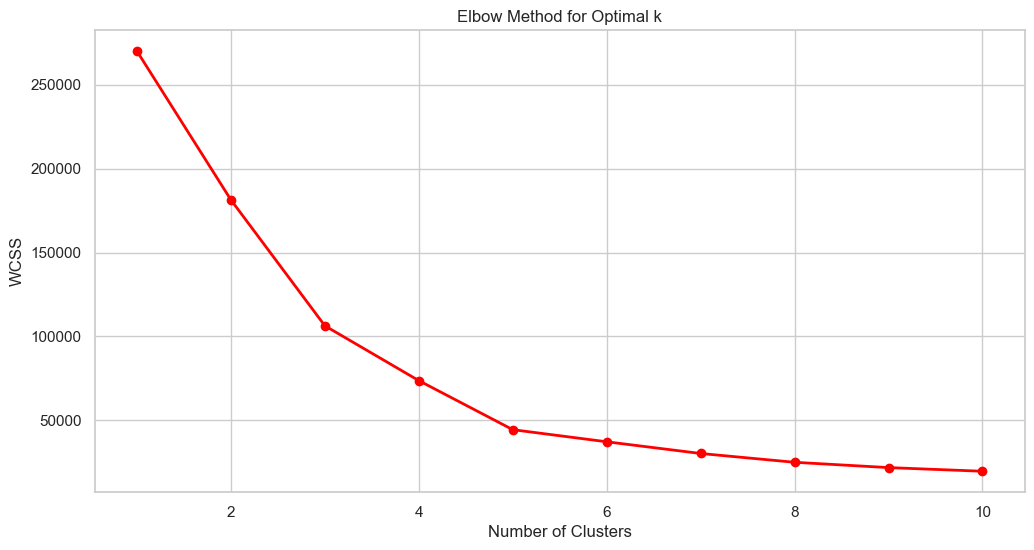

In [21]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

# List to store the WCSS values
wcss = []

# Calculate WCSS for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss,linewidth=2,color='red', marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [23]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


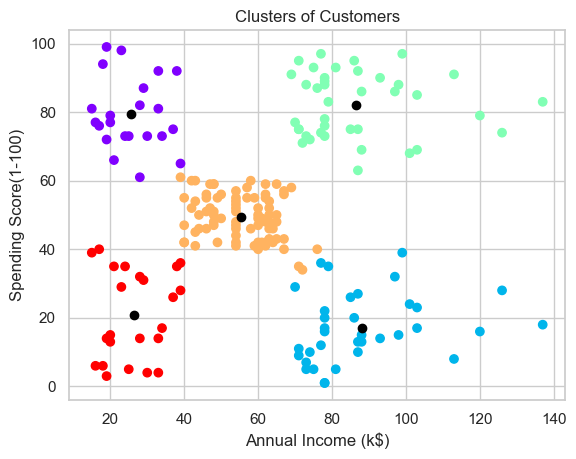

In [24]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


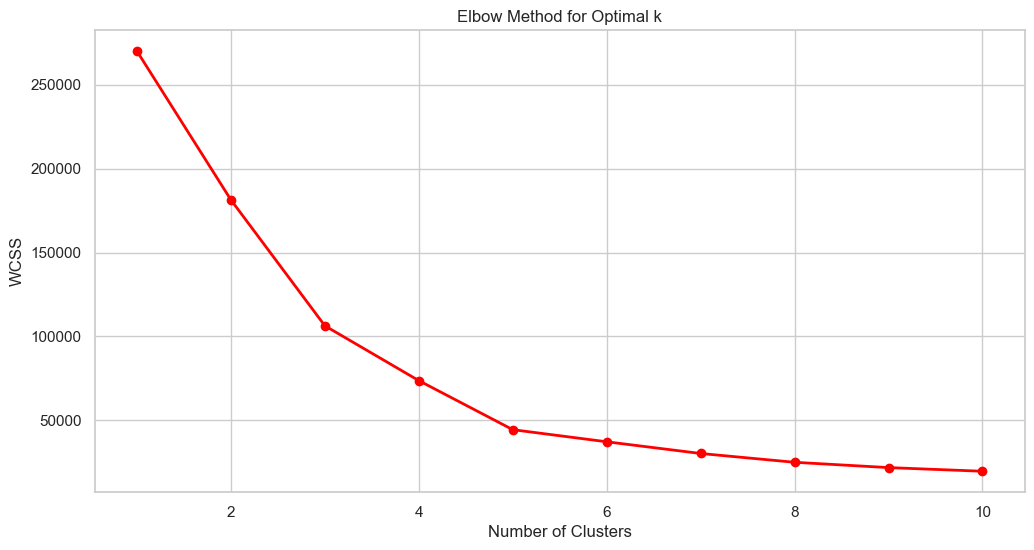

In [25]:
X3=df.iloc[:,1:]

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss,linewidth=2,color='red', marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [26]:
 kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [27]:
print(kmeans.cluster_centers_)

[[25.27272727 25.72727273 79.36363636]
 [42.9375     55.0875     49.7125    ]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]]


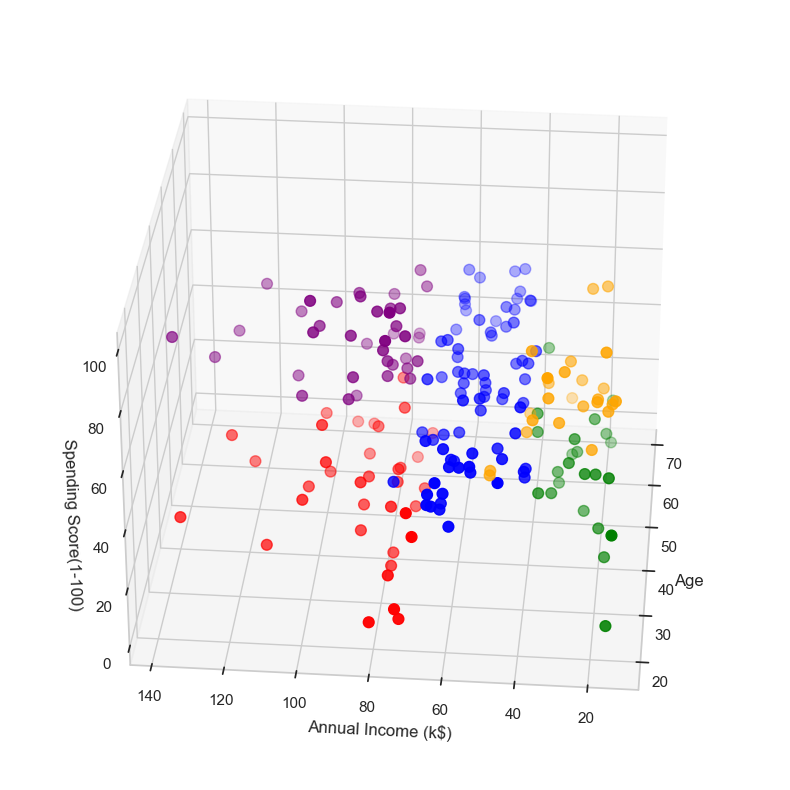

In [28]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import axes3d 
fig= plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label ==0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label ==0], c='blue',s=60)
ax.scatter(df.Age[df.label ==1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label ==1], c='red',s=60)
ax.scatter(df.Age[df.label ==2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label ==2], c='green',s=60)
ax.scatter(df.Age[df.label ==3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label ==3], c='orange',s=60)
ax.scatter(df.Age[df.label ==4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label ==4], c='purple',s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score(1-100)")
plt.show()

In [29]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


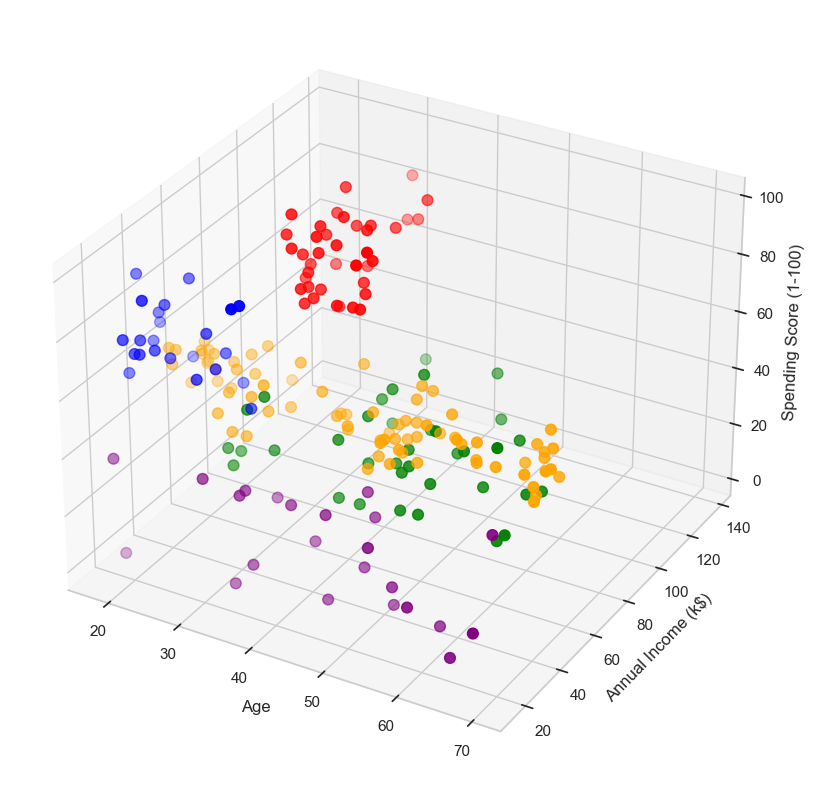

In [30]:

from matplotlib.animation import FuncAnimation

# 3D plot for KMeans clusters
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
scatters = []
scatters.append(ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], 
                           df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label='Cluster 0'))
scatters.append(ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], 
                           df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label='Cluster 1'))
scatters.append(ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], 
                           df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label='Cluster 2'))
scatters.append(ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], 
                           df["Spending Score (1-100)"][df.label == 3], c='orange', s=60, label='Cluster 3'))
scatters.append(ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], 
                           df["Spending Score (1-100)"][df.label == 4], c='purple', s=60, label='Cluster 4'))

# Set initial view angle and labels
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

# Function to rotate the plot
def rotate(angle):
    ax.view_init(elev=30, azim=angle)

# Animation function that will be called for each frame
def animate(frame):
    rotate(frame)  # Rotate the view
    return scatters  # Return the list of scatter plots

# Create an animation object, rotate over 360 degrees (frames)
ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 2), interval=50)

# Save the animation as a GIF or mp4 (optional)
# ani.save('3d_scatter_rotation.gif', writer='imagemagick', fps=30)  # For GIF
# ani.save('3d_scatter_rotation.mp4', writer='ffmpeg', fps=30)  # For MP4

# Show the plot
plt.show()


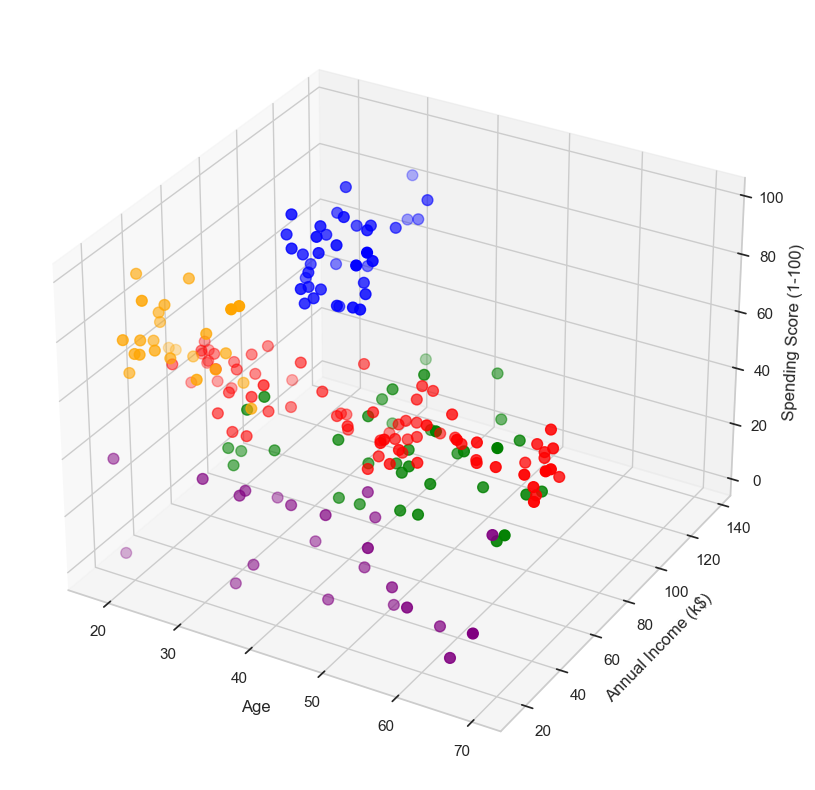

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate KMeans clusters
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

# Create figure and 3D axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
scatters = []
scatters.append(ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], 
                           df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label='Cluster 0'))
scatters.append(ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], 
                           df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label='Cluster 1'))
scatters.append(ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], 
                           df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label='Cluster 2'))
scatters.append(ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], 
                           df["Spending Score (1-100)"][df.label == 3], c='orange', s=60, label='Cluster 3'))
scatters.append(ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], 
                           df["Spending Score (1-100)"][df.label == 4], c='purple', s=60, label='Cluster 4'))
scatters.append(ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], 
                           df["Spending Score (1-100)"][df.label == 5], c='yellow', s=60, label='Cluster 5'))

# Set labels
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

# Function to update the plot and rotate the view
def animate(frame):
    ax.view_init(elev=30, azim=frame)  # Rotate plot by adjusting azimuth angle
    return scatters  # Return scatter plots for FuncAnimation

# Create animation by rotating from 0 to 360 degrees
ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 2), interval=100)

# Show the animation
plt.show()


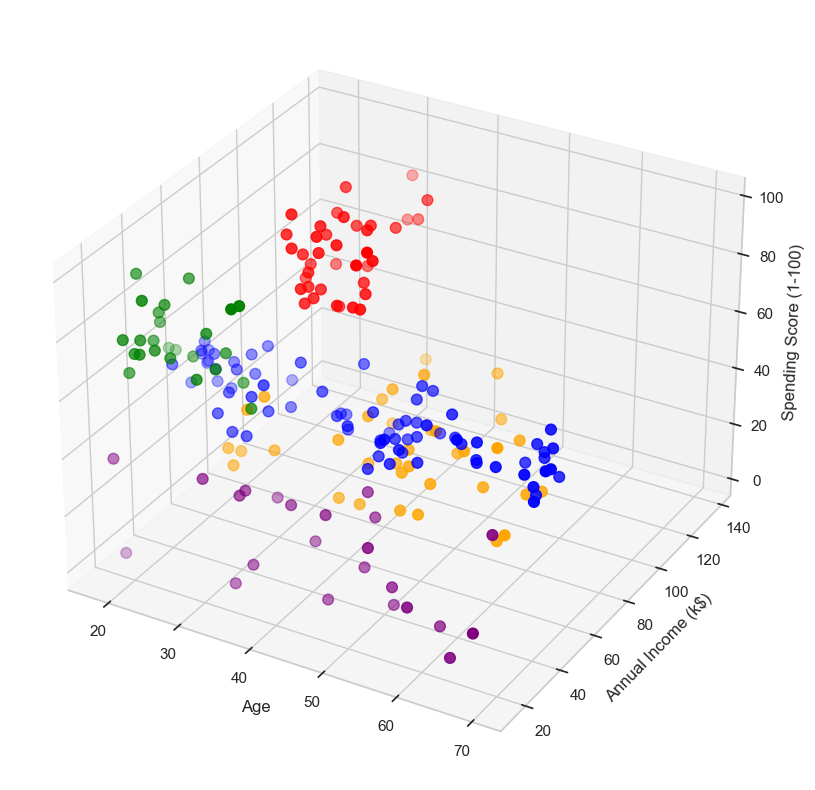

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate KMeans clusters
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

# Create figure and 3D axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
scatters = []
scatters.append(ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], 
                           df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label='Cluster 0'))
scatters.append(ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], 
                           df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label='Cluster 1'))
scatters.append(ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], 
                           df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label='Cluster 2'))
scatters.append(ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], 
                           df["Spending Score (1-100)"][df.label == 3], c='orange', s=60, label='Cluster 3'))
scatters.append(ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], 
                           df["Spending Score (1-100)"][df.label == 4], c='purple', s=60, label='Cluster 4'))
scatters.append(ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], 
                           df["Spending Score (1-100)"][df.label == 5], c='yellow', s=60, label='Cluster 5'))

# Set labels
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

# Function to update the plot and rotate the view
def animate(frame):
    ax.view_init(elev=30, azim=frame)  # Rotate plot by adjusting azimuth angle
    return scatters  # Return scatter plots for FuncAnimation

# Create animation by rotating from 0 to 360 degrees
# Adjust the interval and frame steps to control the speed
ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 5), interval=50)  # Rotate faster

# Show the animation
plt.show()
